# SI 618 Homework #4

## Taylor Swift songs

Last updated 2024-10-02

The dataset for this assignment is from https://www.kaggle.com/datasets/jarredpriester/taylor-swift-spotify-dataset/data.


This dataset consist of data from Spotify's API on all albums listed on Spotify for Taylor Swift. I set up the dataset to update monthly so that if any albums get added it will get added to the dataset too. At first it may look like there are song duplicates but I checked and all song IDs are unique.

The columns in this dataset are:

name - the name of the song

album - the name of the album

release_date - the day month and year the album was released

track number - the order the song appears on the album

id - the Spotify id for the song

uri - the Spotify uri for the song

acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

danceability - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

instrumentalness - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

loudness - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

speechiness - detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

tempo - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

popularity - the popularity of the song from 0 to 100

duration_ms - The duration of the track in milliseconds.

We are going to refer to the tracks' properties of danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, and valence as "features" of the tracks.



Points will be allocated according to the following rubric:

- 90-100%: Question is correctly and completely answered.  Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is 
accompanied by a written interpretation in a Markdown block.  Written interpretation does not contain spelling, grammar or stylistic errors (see [Strunk & White](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view?usp=sharing) for a detailed specifications).  Minor problems, such as formatting, incorrect submissions, missing names, etc. will result in less than 100%.
- 75-85% : Answer is mostly complete and correct; two or fewer noticeable omissions or errors.  Minor stylistic flaws, either in code or in
written interpretation.
- 50-70%: Answer has significant omissions or errors; Noticeable departure from PEP-8 guildelines and/or moderate spelling, grammar, or style issues
in written interpretations.
- 25-45%: Question is perfunctorily attempted.  Substantial parts are missing or incorrect.
- 0 points: Question not attempted.

Be sure to include interpretations of your results for each question.

Q1 (10pts):             
* (a) Show the distribution of the popularity of the songs.  Then exclude the songs that are marked as "Taylor's version".  Show the distribution of the popularity of the songs.  What is the difference between the two distributions?
* (b) Show the variation in song popularity over the years. Are there any notable trends or observations? Please explain.

In [28]:
# Import dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [29]:
# import the spotify data
data = pd.read_csv('taylor_swift_spotify.csv')

In [30]:
# process the release date
data['release_date'] = pd.to_datetime(data['release_date'])

# process the track duration from ms to seconds
data['duration_s'] = round(data['duration_ms'] / 1000)

In [31]:
data.describe()

,Unnamed: 0,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_s
count,582.000000,582,582.00000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,290.500000,2018-04-17 22:43:17.938144256,11.42268,0.333185,0.580804,0.565832,0.003393,0.161130,-7.661986,0.056475,122.398954,0.391000,57.857388,240011.189003,239.994845
min,0.000000,2006-10-24 00:00:00,1.00000,0.000182,0.175000,0.118000,0.000000,0.033500,-17.932000,0.023100,68.097000,0.038400,0.000000,83253.000000,83.000000
25%,145.250000,2012-10-22 00:00:00,5.00000,0.037325,0.515000,0.418000,0.000000,0.096525,-9.400750,0.030300,96.888000,0.230000,45.000000,211823.000000,212.000000
50%,290.500000,2020-08-18 00:00:00,10.00000,0.184500,0.593500,0.571000,0.000002,0.114500,-7.352500,0.037600,119.054500,0.374000,62.000000,235433.000000,235.000000
75%,435.750000,2022-10-22 00:00:00,15.00000,0.660000,0.653000,0.719000,0.000058,0.161000,-5.494750,0.054800,143.937250,0.522500,70.000000,260819.500000,260.750000
max,581.000000,2024-04-19 00:00:00,46.00000,0.971000,0.897000,0.948000,0.333000,0.931000,-1.927000,0.912000,208.918000,0.943000,93.000000,613026.000000,613.000000
std,168.153204,NaN,8.04206,0.327171,0.114553,0.191102,0.027821,0.136563,2.904653,0.070859,30.408485,0.195829,16.152520,45928.954305,45.926923


In [32]:
data.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_s
0,0,Fortnight (feat. Post Malone),THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,1,6dODwocEuGzHAavXqTbwHv,spotify:track:6dODwocEuGzHAavXqTbwHv,0.5020,0.504,0.386,0.000015,0.0961,-10.976,0.0308,192.004,0.281,82,228965,229.0
1,1,The Tortured Poets Department,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,2,4PdLaGZubp4lghChqp8erB,spotify:track:4PdLaGZubp4lghChqp8erB,0.0483,0.604,0.428,0.000000,0.1260,-8.441,0.0255,110.259,0.292,79,293048,293.0
2,2,My Boy Only Breaks His Favorite Toys,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,3,7uGYWMwRy24dm7RUDDhUlD,spotify:track:7uGYWMwRy24dm7RUDDhUlD,0.1370,0.596,0.563,0.000000,0.3020,-7.362,0.0269,97.073,0.481,80,203801,204.0
3,3,Down Bad,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,4,1kbEbBdEgQdQeLXCJh28pJ,spotify:track:1kbEbBdEgQdQeLXCJh28pJ,0.5600,0.541,0.366,0.000001,0.0946,-10.412,0.0748,159.707,0.168,82,261228,261.0
4,4,"So Long, London",THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,5,7wAkQFShJ27V8362MqevQr,spotify:track:7wAkQFShJ27V8362MqevQr,0.7300,0.423,0.533,0.002640,0.0816,-11.388,0.3220,160.218,0.248,80,262974,263.0


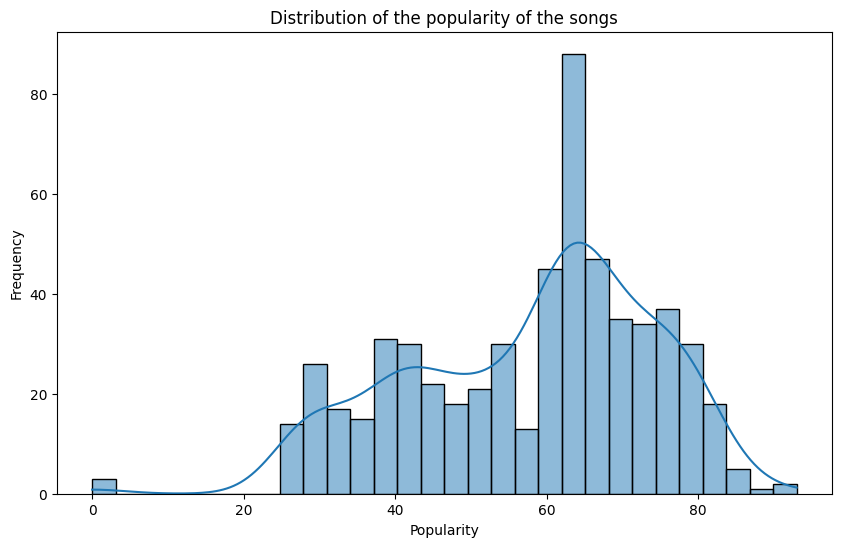

In [33]:
# Q1 Distribution of the popularity of the songs
plt.figure(figsize=(10, 6))
sns.histplot(data.popularity, bins=30, kde=True)
plt.title('Distribution of the popularity of the songs')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

In [34]:
# Q1 Distribution of the popularity of the songs excluding "Taylor's Version"
data_exclude_taylor_version = data[data['name'].str.contains(r"Taylor'|’s Version") == False]
data_exclude_taylor_version.describe() # check the descriptive statistics of the data

data['taylor_version'] = np.where(data['name'].str.contains(r"Taylor'|’s Version"), 1,0)

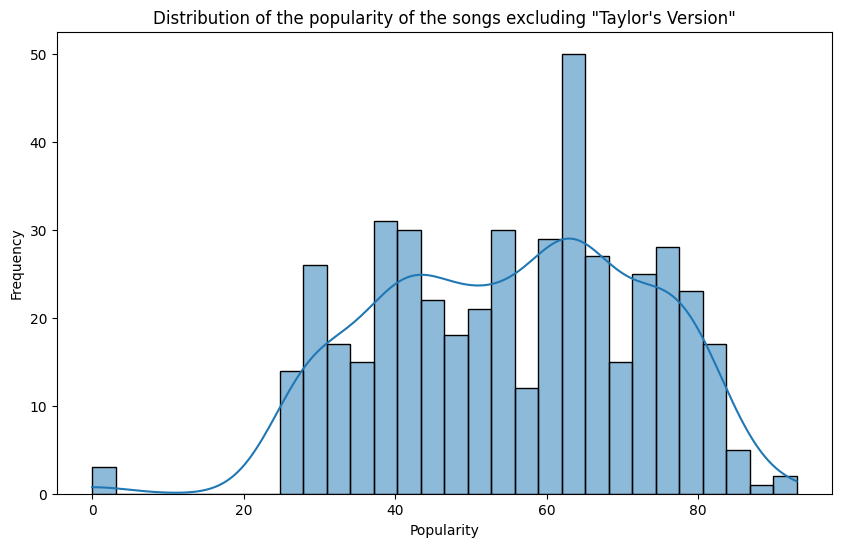

In [35]:
# Plot the distribution of the popularity of the songs excluding "Taylor's Version"
plt.figure(figsize=(10, 6))
sns.histplot(data_exclude_taylor_version.popularity, bins=30, kde=True)
plt.title('Distribution of the popularity of the songs excluding "Taylor\'s Version"')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

The distributions of the popularity of all songs and songs excluding "Taylor's Version" are quite similar. However, the frequencies of songs with popularity above 60 are lower after excluding "Taylor's Version". This may suggest that popularity of "Taylor's Version" songs are higher and centered around 60.

In [36]:
# Q1.2 Show the trend of the popularity of the songs over years
## Show the average rating of the songs over years
data['release_year'] = data['release_date'].dt.year.astype(int)
popularity_year = data.groupby('release_year')['popularity'].mean().reset_index()

In [37]:
data['release_year'].dtype

dtype('int64')

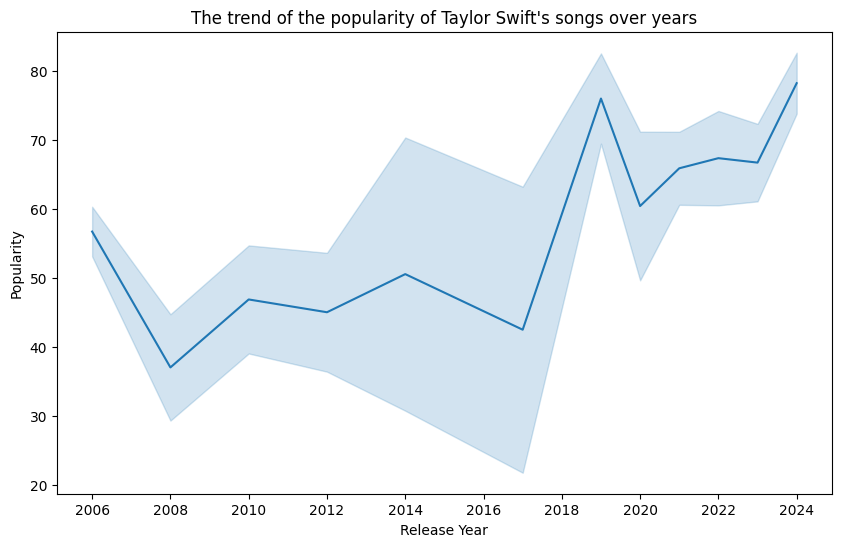

In [38]:
# plot the trend of the (mean, sd) popularity of the songs over years
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='release_year', y='popularity', errorbar='sd')
plt.title('The trend of the popularity of Taylor Swift\'s songs over years')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.xticks(range(2006,2025,2))
plt.show()

Generally the popularity of the Taylor Swift songs has been increasing over the years. The popularity of the songs between 2008 and 2017 is relatively stable. After 2017, the popularity of the songs increased dramatically. And in recent two years, the popularity of the songs surged again. The variance of the popularity of the songs is higher between 2012 and 2017 than in recent 5 years.

Q2 (10pts):                     
* Report the average track duration for each album.     
* Your answer should be in mm:ss (minutes:seconds) format rather than the milliseconds that are reported in the original dataset. 

In [39]:
# Q2.1 Show the average track duration for each album
## Calculate the average track duration for each album

def convert_second(seconds):
    minutes = int(seconds // 60)
    seconds = int(seconds % 60)
    return f'{minutes:02d}:{seconds:02d}'

In [40]:
track_duration_album = data.groupby('album')['duration_s'].mean().reset_index()
track_duration_album['duration'] =\
    track_duration_album['duration_s'].apply(convert_second)
track_duration_album = track_duration_album.sort_values('duration_s', ascending=False)
track_duration_album[['album', 'duration']]

,album,duration
18,Speak Now World Tour Live,04:57
15,Speak Now,04:47
17,Speak Now (Taylor's Version),04:45
16,Speak Now (Deluxe Package),04:36
14,Red (Taylor's Version),04:21
5,Fearless (Platinum Edition),04:10
13,Red (Deluxe Edition),04:07
6,Fearless (Taylor's Version),04:05
19,THE TORTURED POETS DEPARTMENT,04:04
23,evermore (deluxe version),04:03


Q3 (15pts):     
* Generate correlation heatmaps to visualize the relationships between song features, utilizing a diverging color map with white representing a zero correlation.       
* Identify the top five strongest correlations among these features.    
* Provide an analysis of your findings, including explanations for why certain variables exhibit strong correlations and the potential rationale behind these relationships.



In [41]:
data.columns

Index(['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id',
       'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms', 'duration_s', 'taylor_version', 'release_year'],
      dtype='object')

In [42]:
# Q3 Generate a correlation heatmap to visualize the relationship between the song features
## Create a correlation matrix
char = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
        'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_s']
corr = data[char].corr()

Text(0.5, 1.0, 'Correlation Heatmap of the Song Features')

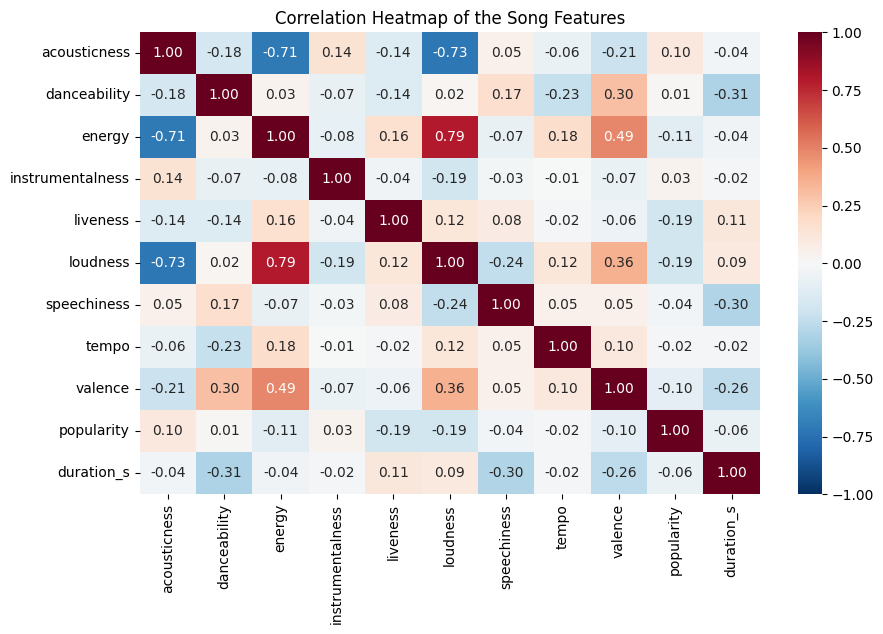

In [43]:
## Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='RdBu_r', vmax=1, vmin=-1, fmt=".2f")
plt.title("Correlation Heatmap of the Song Features")

Text(0.5, 1.0, 'Correlation Heatmap of the Song Features')

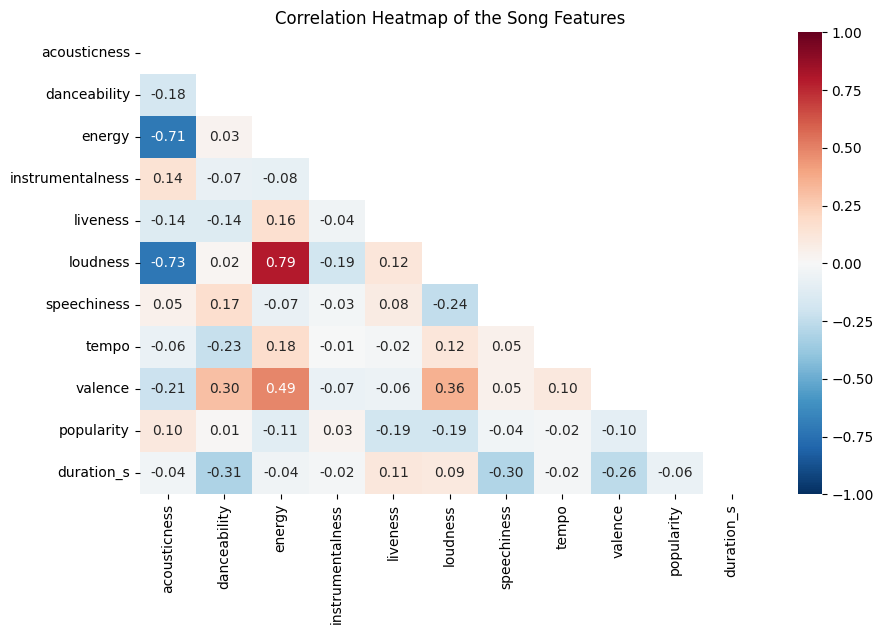

In [44]:
## Create a heatmap of the correlation matrix that excluding duplicated values
mask = np.triu(np.ones_like(corr, dtype=bool)) # create a mask to hide the upper triangle
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='RdBu_r', vmax=1, vmin=-1, fmt=".2f", mask=mask)
plt.title("Correlation Heatmap of the Song Features")

In [45]:
## Show the five strongest absolute correlations
mask = np.triu(np.ones_like(corr, dtype=bool), k=1) 
corr_e = corr.where(mask) # Exclude the duplicated and the self-correlation
corr_matrix_long = corr_e.unstack().reset_index() 
corr_matrix_long.columns = ['feature1', 'feature2', 'correlation']
corr_matrix_long.sort_values('correlation', ascending=False, key=abs).head(5)

,feature1,feature2,correlation
57,loudness,energy,0.794626
55,loudness,acousticness,-0.725913
22,energy,acousticness,-0.711983
90,valence,energy,0.487221
93,valence,loudness,0.357034


Q3.2 & Q3.3: The top five strongest correlations among these features are: 
1. Strong positive correlation ($\rho=0.79$) between loudness and energy: This may be due to loud music being perceived as more energetic. 
2. Strong negative correlation ($\rho=-0.73$) between loudness and acousticness: Loudness means the volume of the music is high, which is usually the opposite of acoustic music. Acoustic music is generally softer and quieter.
3. Strong negative correlation ($\rho=-0.71$) between acousticness and energy: Acoustic music is generally softer and quieter, which is less likely to be perceived energetic. Energetic music is usually louder and faster.
4. Moderate to strong positive correlation ($\rho=0.49$) between valence and energy: Energetic music is usually more positive and cheerful. So the valence of the energetic music is higher.
5. Moderate positive correlation ($\rho=0.36$) between valence and loudness: Loud music are generally perceived as energetic and cheerful. The valence of the loud music is generally higher.

Q4 (10pts): 
- Analyze how the position of the track on the album (i.e., track number) influences the song's popularity, considering additional musical features. 
- Specifically, evaluate the correlation between track number and popularity, and then examine if certain musical features (e.g., danceability, energy, acousticness) mediate this relationship. 
- Use both visual and statistical evidence to support your findings. 
- Discuss how these features may interact with track position to affect a song's popularity

In [46]:
# Q4 Analyze how the position of track influence the popularity of the songs
## Calculate the correlation between the position of the track and the popularity
corr_position_popularity = data[['track_number', 'popularity']].corr()
corr_position_popularity

,track_number,popularity
track_number,1.000000,-0.227873
popularity,-0.227873,1.000000


There is a moderate to weak negative correlation between track number and popularity ($\rho=-0.23$). It indicates that the songs at the beginning of the album are generally more popular then the songs later in the album. 

In [47]:
corr_position_char = data[['track_number']+char].corr()
corr_position_char

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_s
track_number,1.000000,0.045006,-0.043236,-0.007756,-0.038075,-0.048385,-0.022873,-0.017879,0.048523,-0.018019,-0.227873,0.039066
acousticness,0.045006,1.000000,-0.178000,-0.711983,0.143078,-0.137689,-0.725913,0.047488,-0.064001,-0.214348,0.103761,-0.035576
danceability,-0.043236,-0.178000,1.000000,0.034833,-0.070607,-0.139451,0.016570,0.167959,-0.229525,0.303885,0.013204,-0.308012
energy,-0.007756,-0.711983,0.034833,1.000000,-0.081544,0.157008,0.794626,-0.070511,0.175123,0.487221,-0.111898,-0.039705
instrumentalness,-0.038075,0.143078,-0.070607,-0.081544,1.000000,-0.042495,-0.194656,-0.026335,-0.005492,-0.069740,0.031498,-0.023226
liveness,-0.048385,-0.137689,-0.139451,0.157008,-0.042495,1.000000,0.123641,0.083958,-0.019967,-0.061147,-0.187878,0.111216
loudness,-0.022873,-0.725913,0.016570,0.794626,-0.194656,0.123641,1.000000,-0.243075,0.117701,0.357034,-0.190907,0.094226
speechiness,-0.017879,0.047488,0.167959,-0.070511,-0.026335,0.083958,-0.243075,1.000000,0.049339,0.050848,-0.037221,-0.298035
tempo,0.048523,-0.064001,-0.229525,0.175123,-0.005492,-0.019967,0.117701,0.049339,1.000000,0.102885,-0.018183,-0.020568
valence,-0.018019,-0.214348,0.303885,0.487221,-0.069740,-0.061147,0.357034,0.050848,0.102885,1.000000,-0.095194,-0.262667


Text(0.5, 1.0, 'Correlation Heatmap of the Song Features')

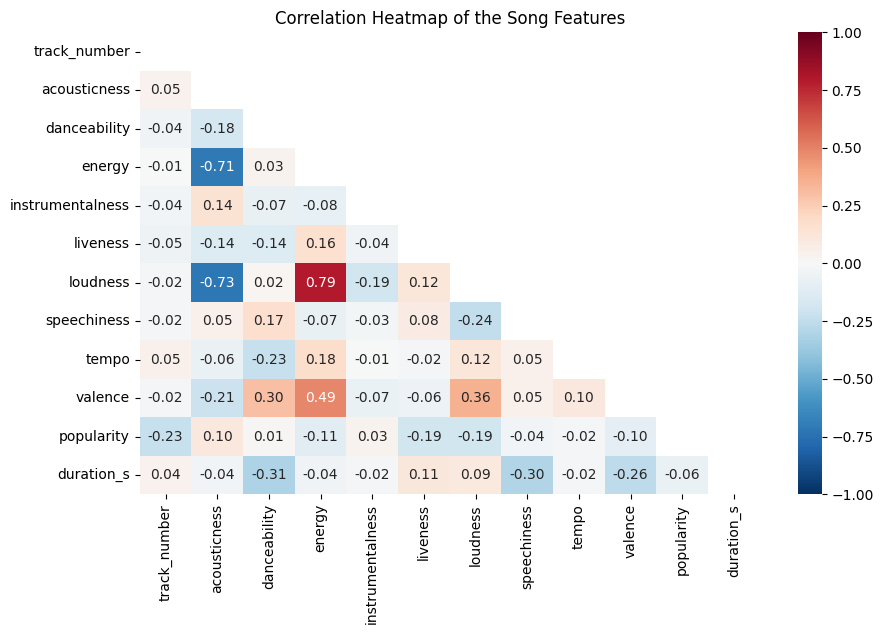

In [48]:
mask = np.triu(np.ones_like(corr_position_char, dtype=bool)) # create a mask to hide the upper triangle
plt.figure(figsize=(10, 6))
sns.heatmap(corr_position_char, annot=True, cmap='RdBu_r', vmax=1, vmin=-1, fmt=".2f", mask=mask)
plt.title("Correlation Heatmap of the Song Features")

**Interactions between track number and musical features:**
There is weak correlations between the musical features including danceability, liveness, tempo and acosticness, and the order of the track in the album. These weak correlations suggest that there might be mediating effects of these musical features on the relationship between track number and popularity. For example, the songs at the beginning of the album are generally more acoustic, which are more popular. But the mediating effects are weak.

Q5 (15pts):
- Explore the characteristics that differentiate popular songs from less popular ones. 
- Divide the songs into popular (popularity rating of 60 or higher) and less popular (popularity rating of less than 60). 
- Conduct a comparative analysis of these two groups across multiple features: danceability, energy, acousticness, and tempo. 
- Use ANOVA tests to determine if differences in these features between popular and less popular songs are statistically significant. 
- Additionally, explore if there's a notable trend in the duration of songs (duration_ms) between the two groups. 

In [49]:
# Q5 Analyze the relationship between the popularity and the song features
## Divide the songs into popular and less popular
data['popularity_class'] = np.where(data['popularity'] >= 60, 'Popular', 'Less Popular')
data['popularity_cat'] = np.where(data['popularity'] >= 60, 1, 0)   
features = ['danceability', 'energy', 'acousticness', 'tempo', 'duration_ms']

In [50]:
## Compare the descriptive statistics of the song features between popular and less popular songs
data.groupby('popularity_class')[features].mean()

,danceability,energy,acousticness,tempo,duration_ms
popularity_class,,,,,
Less Popular,0.575628,0.595621,0.291121,123.185087,245351.573123
Popular,0.584784,0.542924,0.365531,121.794419,235904.449848


In [51]:
data.groupby('popularity_class')[features].std()

,danceability,energy,acousticness,tempo,duration_ms
popularity_class,,,,,
Less Popular,0.110197,0.199643,0.317174,29.995360,45427.845313
Popular,0.117805,0.181263,0.331515,30.754252,45958.211627


Based on the descriptive statistics of two groups of songs. The popular songs have higher danceability but less tempo. Popular songs are more acoustic. Also, the duration of popular songs are a little bit longer than the less popular songs (0.6s longer).

In [52]:
## Conduct an ANOVA test based on the features
for feature in features:
    print(f"ANOVA test for {feature}")
    popularity_ols = smf.ols(f'{feature} ~ popularity_cat', data=data).fit()
    anova_table = sm.stats.anova_lm(popularity_ols, typ=2)
    print(anova_table)
    print("\n")

ANOVA test for danceability
                  sum_sq     df         F    PR(>F)
popularity_cat  0.011989    1.0  0.913481  0.339591
Residual        7.612169  580.0       NaN       NaN


ANOVA test for energy
                   sum_sq     df          F    PR(>F)
popularity_cat   0.397153    1.0  11.063346  0.000936
Residual        20.820883  580.0        NaN       NaN


ANOVA test for acousticness
                   sum_sq     df         F    PR(>F)
popularity_cat   0.791875    1.0  7.480381  0.006428
Residual        61.398936  580.0       NaN       NaN


ANOVA test for tempo
                       sum_sq     df         F   PR(>F)
popularity_cat     276.592276    1.0  0.298762  0.58487
Residual        536960.133224  580.0       NaN      NaN


ANOVA test for duration_ms
                      sum_sq     df        F    PR(>F)
popularity_cat  1.276417e+10    1.0  6.10405  0.013774
Residual        1.212837e+12  580.0      NaN       NaN




**Interpretation of ANOVA**:
1. The $p$-values of the ANOVA test for energy and acousticness and duration are less than 0.05, indicating the differences in energy, acousticness and duration between popular and less popular songs are statistically significant at 95% confidence level. The differences in danceability and tempo are not statistically significant.

Q6 (20pts):
- Build a multiple linear regression model to predict the popularity of a song based on a set of acoustic features: 'liveness', 'danceability', 'energy', and 'acousticness'. Evaluate the model by reporting:

    - The coefficient of determination (i.e. $r^2$) for the entire model to understand how well these variables together predict song popularity.
    - The statistical significance of the regression model and each predictor variable within it.
    - Predictions for song popularity at two different levels of 'liveness': 0.22 and 0.50, while holding other variables at their mean values."

In [53]:
# Q6 Linear Regression Prediction on Popularity
## Building OLS
popularity_feature_ols = smf.ols('popularity ~ liveness + danceability + energy + acousticness', data=data).fit()
print(popularity_feature_ols.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     6.488
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           4.12e-05
Time:                        11:13:49   Log-Likelihood:                -2431.7
No. Observations:                 582   AIC:                             4873.
Df Residuals:                     577   BIC:                             4895.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       63.4141      5.512     11.505   

**Interpretation of the Model**:
1. $F$-statistic is 6.488 with $p<0.05$, indicating that the model as a whole is statistically significant.
2. $r^2$ is 0.043, which means that 4.3% of the variance in song popularity can be explained by the model.
3. The $p$-value for `liveness` is below 0.001. The variable is statistically significant at 99% confidence level. The rest of the variables `danceability`, `energy` and `acousticness` are not statistically significant at the 95% confidence level.

In [54]:
## Prediction
## Predicting popularity at liveness=0.22 and liveness=0.50, holding other variables at their means
popularity_prediction = popularity_feature_ols.get_prediction(pd.DataFrame({'liveness': [0.22, 0.50],
                                                                            'danceability': [data['danceability'].mean(), data['danceability'].mean()],
                                                                            'energy': [data['energy'].mean(), data['energy'].mean()],
                                                                            'acousticness': [data['acousticness'].mean(), data['acousticness'].mean()]}))
popularity_prediction.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,56.646583,0.718794,55.234812,58.058355,25.472559,87.820608
1,50.887661,1.799552,47.353190,54.422132,19.545690,82.229633


**Interpretation of the Predictions**:
Holding other features at their means, the model predicts that songs with a 'liveness' value of 0.22 will have a popularity of 56.6 (95% ci [55.2, 58.1]). Songs with a 'liveness' value of 0.50 will have a popularity of 50.9 (95% ci [47.4, 54.4]). 

Q7 (20pts):
- In addition to analyzing the popularity scores of original vs. re-recorded songs by Taylor Swift, evaluate the differences in their musical characteristics, including danceability, energy, acousticness, and duration_ms. Perform the following analyses:

    - a) Create visualizations that compare the distribution of popularity scores, as well as the mentioned acoustic features, between original and re-recorded songs.

    - b) Conduct statistical tests to determine if there are significant differences in popularity, danceability, energy, acousticness, and duration between the original and re-recorded songs. Report which versions are more favorable in terms of popularity and how the musical characteristics have changed in the re-recorded versions. 
- hint: The re-recorded ones have `(Taylor’s version)` at the end of the album name. 

In [55]:
# Q7 Analyzing the difference between original and re-recorded songs
## Create a label for original and re-recorded songs

data['original'] = np.where(data['album'].str.contains("Taylor's Version"), 'Re-Recorded', 'Original')
## Examine the descriptive statistics
data.groupby('original').describe()


Unnamed: 0                                                \
                 count        mean   min    25%    50%    75%    max   
original                                                               
Original         461.0  331.861171   0.0  236.0  351.0  466.0  581.0   
Re-Recorded      121.0  132.917355  47.0   77.0  107.0  193.0  223.0   

                        release_date                                 ...  \
                    std        count                           mean  ...   
original                                                             ...   
Original     162.780895          461  2017-02-16 14:59:36.572668160  ...   
Re-Recorded   60.950743          121  2022-09-24 09:19:20.330578432  ...   

            release_year           popularity_cat                           \
                     max       std          count      mean  min  25%  50%   
original                                                                     
Original          2024.0  5.520123          461.0  0.459870  0.0  0.0  0.0   
Re-Recorded       2023.0  1.001376          121.0  0.966942  0.0  1.0  1.0   

                                 
             75%  max       std  
original                         
Original     1.0  1.0  0.498928  
Re-Recorded  1.0  1.0  0.179531  

[2 rows x 144 columns]

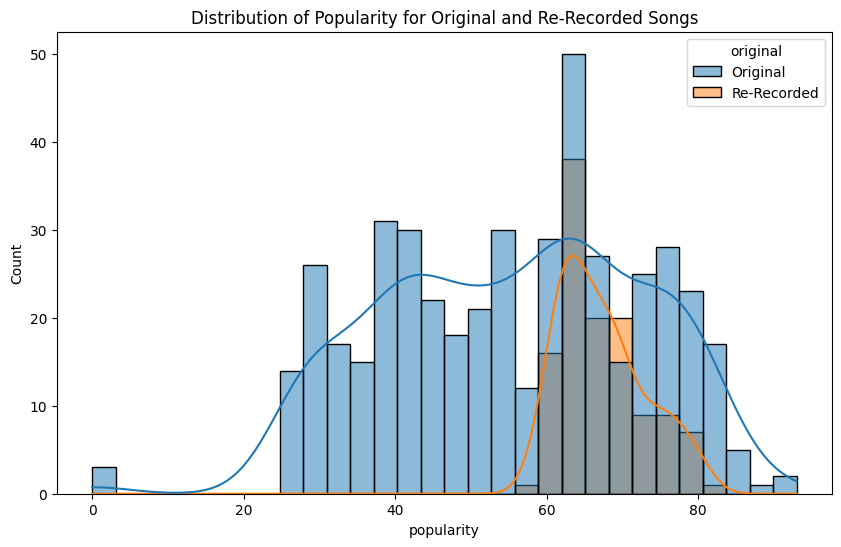

In [56]:
## Create histograms to show the distribution of popularity for original and re-recorded songs
plt.figure(figsize=(10, 6))
sns.histplot(data, x='popularity', hue='original', kde=True, bins=30)
plt.title('Distribution of Popularity for Original and Re-Recorded Songs')
plt.show()

The distribution of popularity between original and re-recorded songs are evidently different. Most of the re-recorded songs have a popularity score above 60. About half of the original songs have a popularity score below 60. There are also some original songs with little popularity. Though the two groups have most songs with around 65 popularity score, the original songs have a longer left tail.

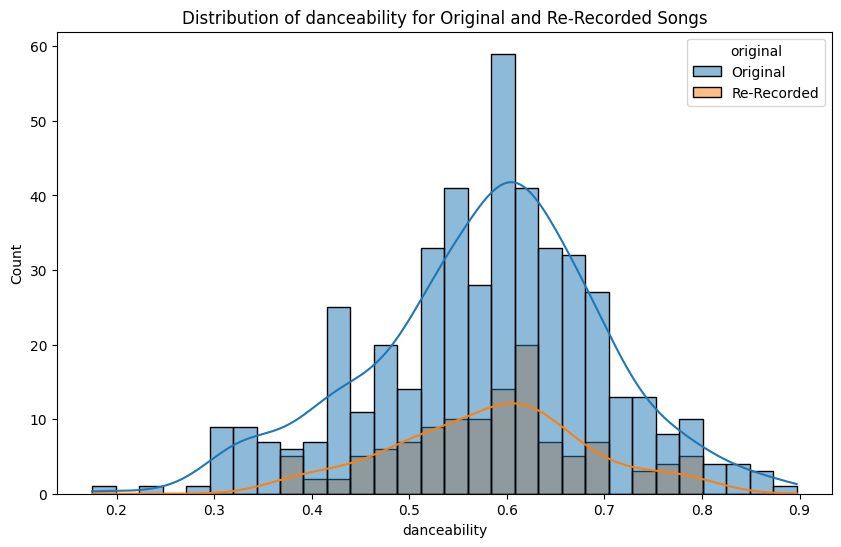

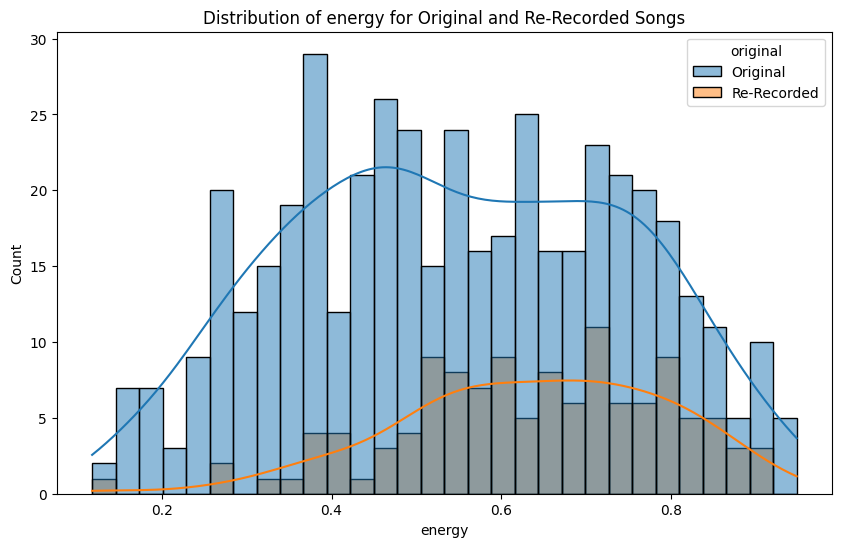

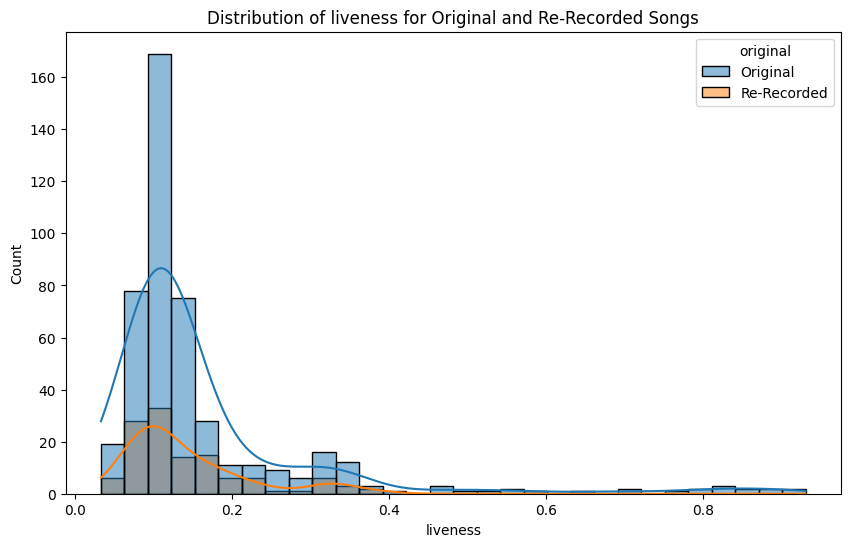

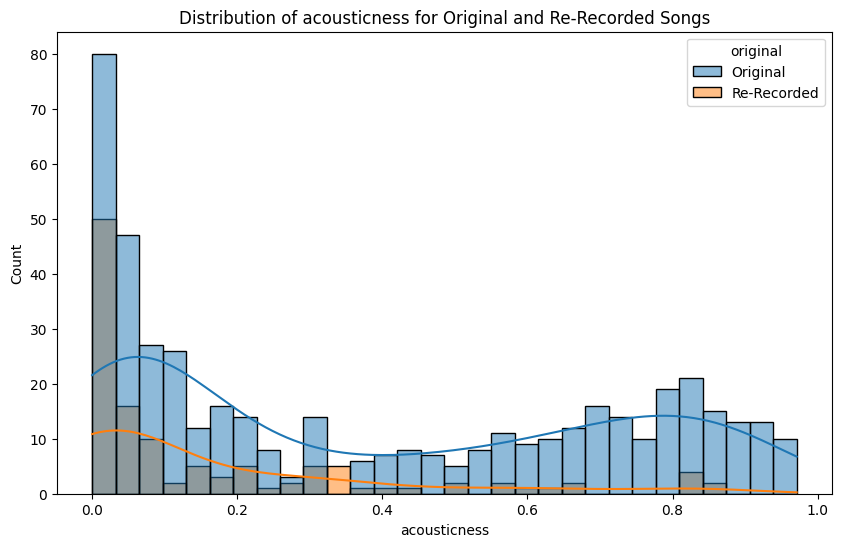

In [57]:
for feature in ['danceability', 'energy', 'liveness', 'acousticness']:
    plt.figure(figsize=(10, 6))
    sns.histplot(data, x=feature, hue='original', kde=True, bins=30)
    plt.title(f'Distribution of {feature} for Original and Re-Recorded Songs')
    plt.show()

1. The distributions of danceability of originial and re-recorded songs are quite similar. Both are similar to normal distribution and are centered around 60.
2. The distribution of energy of original songs is more similar to binomial distribution while the distribution of energy of re-recorded songs is more similar to normal distribution. The distributions suggest that the mean of energy for re-recorded songs is higher than that of original songs.
3. The distributions of liveness of two groups are quite similar. They both centered around 0.15 and have a long right tail.
4. The distributions of acousticness of two groups are both right-skewed. The distribution of acousticness of original songs is more similar to binomial distribution that the that of re-recorded songs.

In [58]:
## Conduct difference of means tests to compare the characteristics of original and re-recorded songs
for feature in ['danceability', 'energy', 'liveness', 'acousticness', 'duration_ms']:
    diff = data.groupby('original')[feature].mean().diff().iloc[-1]
    t_stat, p_value, df = sm.stats.ttest_ind(data[data['original'] == 'Original'][feature], data[data['original'] == 'Re-Recorded'][feature])
    print(f'T-test for {feature}:')
    print(f'Difference of means (Re-Recorded - Original): {diff:.2f}')
    print(f't-statistic: {t_stat:.2f}')
    print(f'p-value: {p_value:.4f}')
    print(f'Degree of Freedom {df}\n')

T-test for danceability:
Difference of means (Re-Recorded - Original): 0.01
t-statistic: -0.49
p-value: 0.6276
Degree of Freedom 580.0

T-test for energy:
Difference of means (Re-Recorded - Original): 0.09
t-statistic: -4.73
p-value: 0.0000
Degree of Freedom 580.0

T-test for liveness:
Difference of means (Re-Recorded - Original): -0.02
t-statistic: 1.74
p-value: 0.0824
Degree of Freedom 580.0

T-test for acousticness:
Difference of means (Re-Recorded - Original): -0.22
t-statistic: 6.76
p-value: 0.0000
Degree of Freedom 580.0

T-test for duration_ms:
Difference of means (Re-Recorded - Original): 10761.74
t-statistic: -2.30
p-value: 0.0217
Degree of Freedom 580.0



**Interpretation of t-test results**:
1. The danceability of re-recorded songs are 0.01 higher than original songs on average. The difference of the means of danceability between two groups is not statistically significant.
2. Energy of re-recorded songs are 0.09 higher than that of original songs on average. The difference of the means of energy between two groups is statistically significant at 95% confidence level.
3. Liveness of re-recorded songs are 0.02 lower than that of original songs on average. The difference of the means of liveness between two groups is not statistically significant at 95% confidence level.
4. Acousticness of re-recorded songs are 0.22 lower than that of original songs on average. The difference of the means of acousticness between two groups is statistically significant at 95% confidence level.
5. The re-recorded songs are 10.8 seconds longer than the original songs on average. The difference of the means of duration between two groups is statistically significant at 95% confidence level.

BONUS, worth up to 2 points: How would you determine whether [Taylor Swift has had an effect on the presidential election of 2024](https://www.nytimes.com/2024/09/19/us/elections/taylor-swift-trump-harris-poll.html)?  What data would you need?  What analysis would you perform?  What would you expect the results to be?

**Settings**:
To evaluate Taylor Swift's influence on presidential election, ideally we should evaluate the poll results before and after Taylor Swift's endorsement of Kamala Harris. But this is not reasonable in a real world as we cannot hold two presidential elections in such a short period. 

Instead, we can use public survey about attitude towards two president candidates to be an instrument for the poll results. Because we can assume that voter will vote for the candidate they prefer. By design, we can recruit a large group of people and ask them about their preference toward two candidates before and after Taylor Swift's endorsement. We can then compare the change of preference between two groups of people with the difference-in-differences approach.

**Data**:
We need to recruit a large sample of voters. We need to ensure that the sample is representative of the whole voter population. We then randomly divide the sample to two groups of equal sizes. One group will view Taylor's endorsement and the other group will view other things that are not relevant to Taylor. Given that the attitudes toward Taylor is possibly correlated with party identification/ party preference. We need to compare the sample mean of the demographics data (age, gender, etc.), party identification, and their attitude towards Taylor to ensure that there is no endogeneity issues in our sample. Then, we collect their survey responses about their preference toward two candidates before and after viewing Taylor Swift's endorsement.

**Analysis**:
We can use the difference-in-differences approach to evaluate the effect of Taylor Swift's endorsement on the presidential election to avoid the influence of time trends and systematic difference between Taylor fans and not fans. We can compare the change of preference toward two candidates between the group of people who have seen Taylor Swift's endorsement and the group of people who have not seen Taylor Swift's endorsement. We can then run a t-test or a regression to evaluate the statistical significance of the difference.

**Identification**:
$$
y = \beta_0 + \beta_1 \text{Treatment} + \beta_2 \text{After} + \beta_3 \text{Treatment} \times \text{After} + \epsilon
$$
Given $y$ as the likelihood to vote for Kamala Harris, $\text{Treatment}$ as the indicator for whether the person has seen Taylor Swift's endorsement, and $\text{After}$ as the indicator for whether the survey is conducted after the endorsement. $\beta_3$ is our coefficient of interest. If $\beta_3$ is positive and statistically significant, we can conclude that Taylor Swift's endorsement has a positive effect on the likelihood to vote for Kamala Harris. If $\beta_3$ is not statistically significant, we roughly conclude that Taylor Swift's endorsement has no effect on the likelihood to vote for Kamala Harris.

### Submit your completed assignment in both IPYNB and HTML formats.